In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load selected Log file

In [ ]:
LOGDIR = os.path.join("logs")
FILE_PATH = os.path.join(LOGDIR, "150_20_01_200.csv")
df = pd.read_csv(FILE_PATH)

In [11]:
# Define the metrics to plot
metrics = [
    "avg_execution_time", "avg_memory_usage", "worst_solution_fitness", 
    "best_solution_fitness", "avg_solution_fitness", "variance_solution_fitness"
]
sns.set_theme(style="darkgrid")

## Plot the metrics

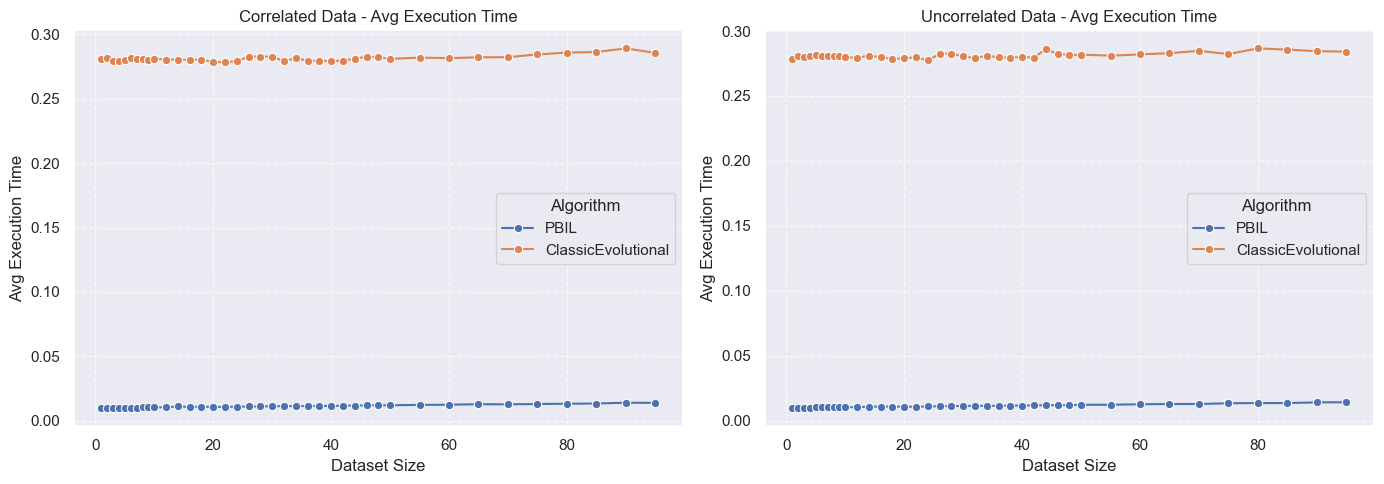

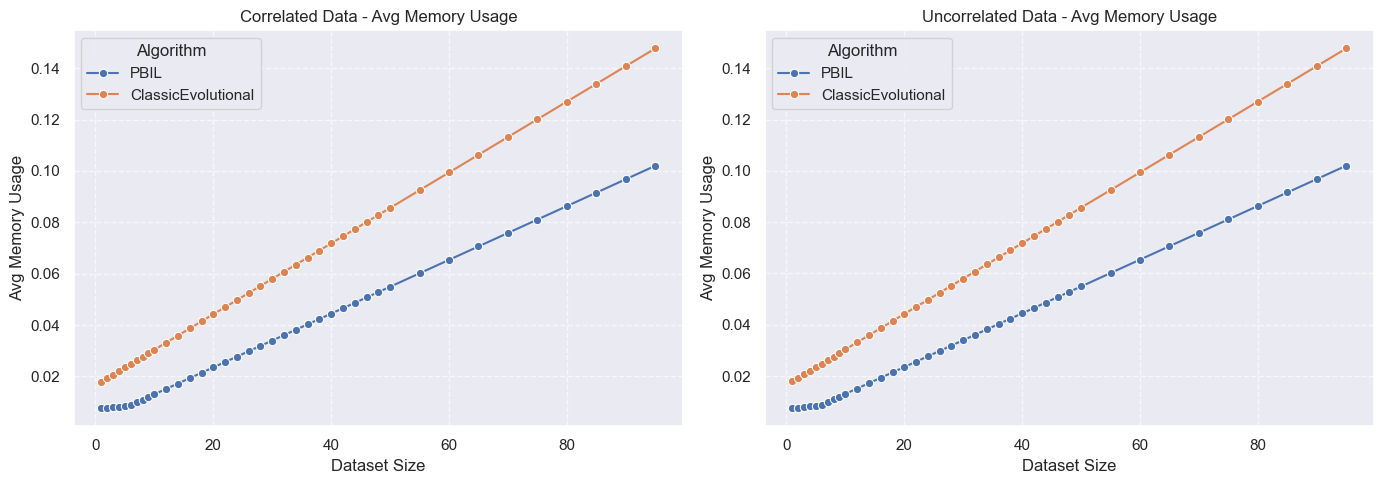

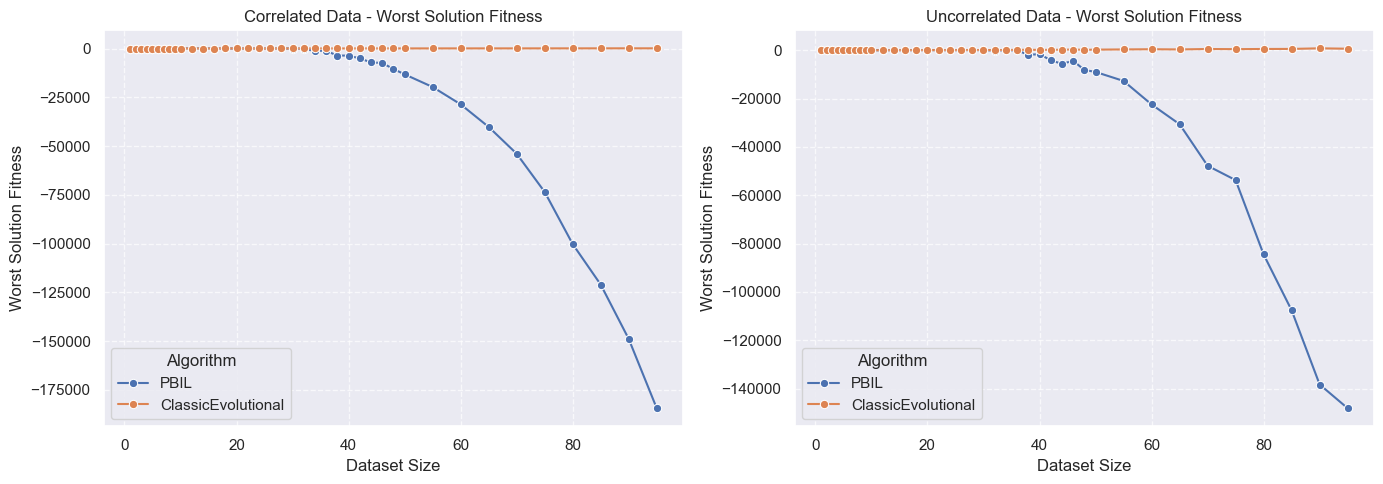

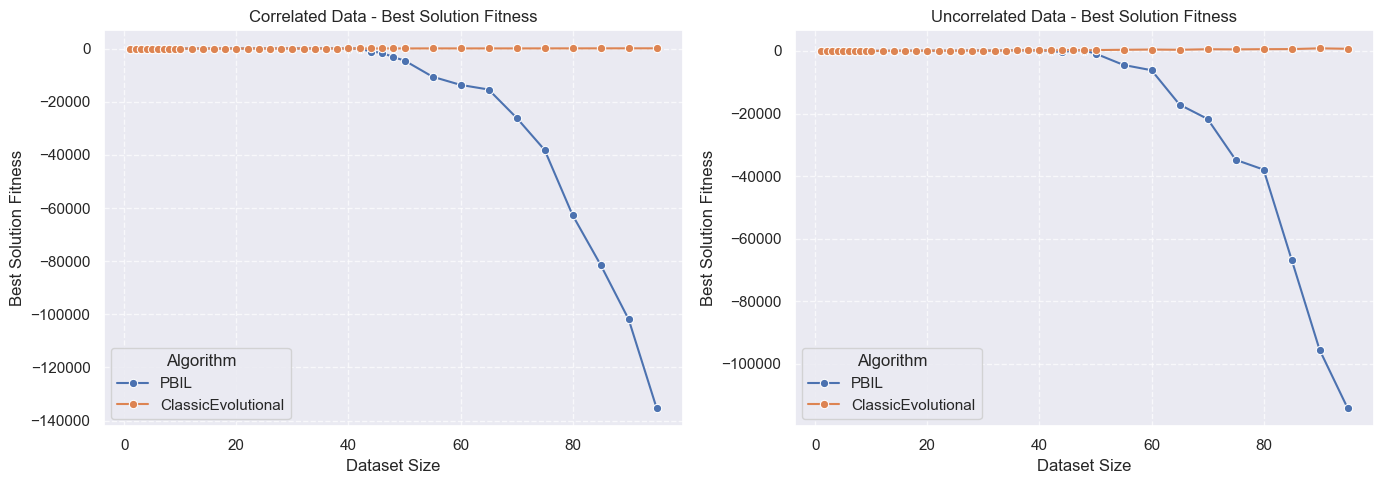

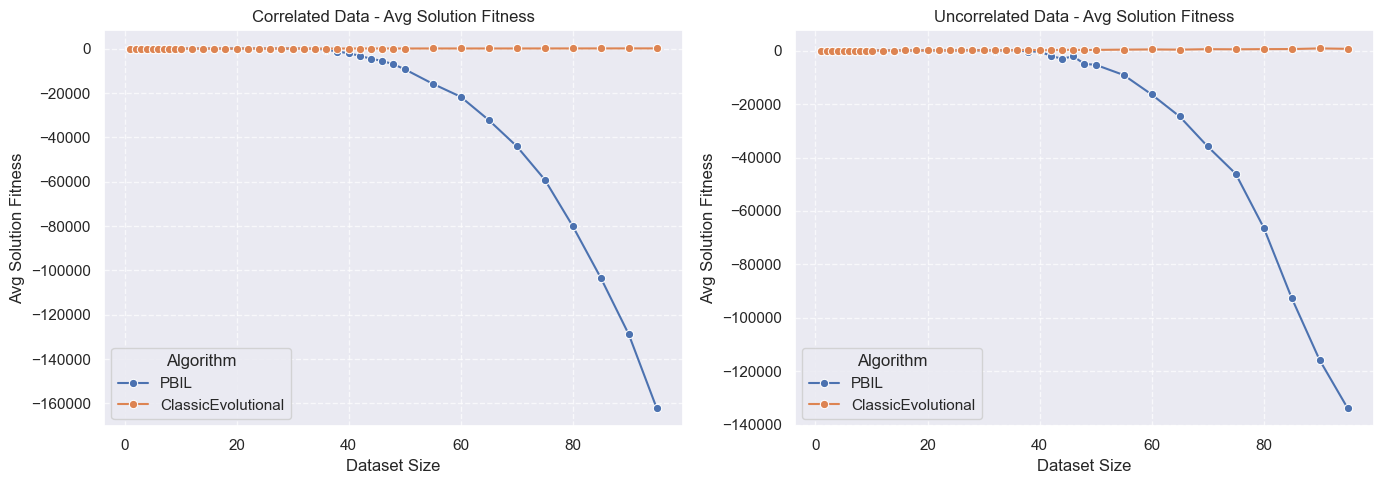

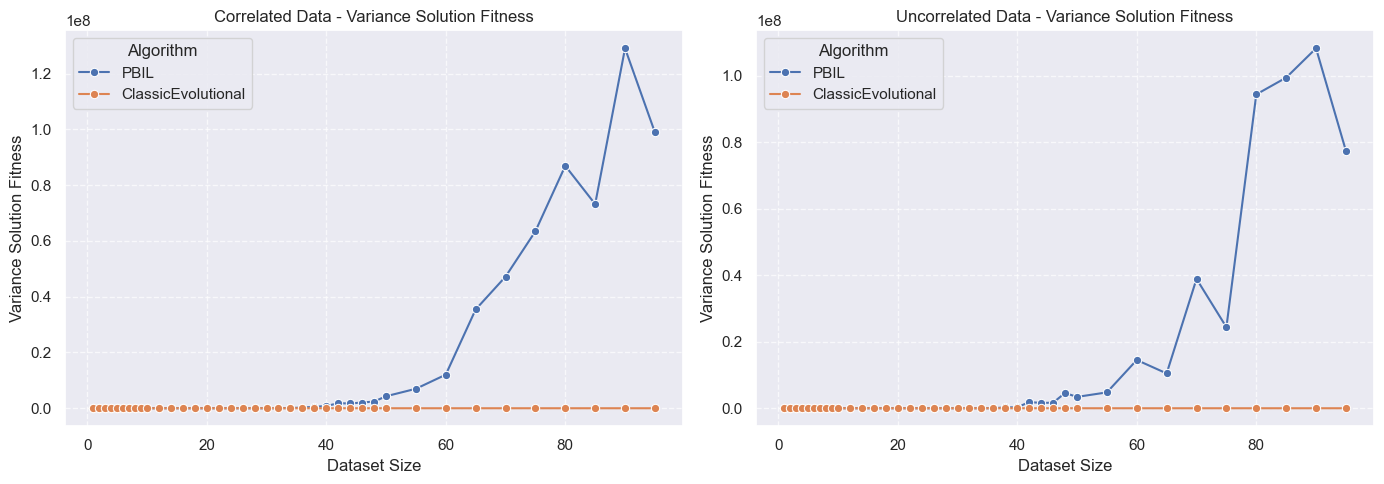

In [41]:
for metric in metrics:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    data_subsets = [
        (df[df['data_corelated'] == True], 'Correlated Data'),
        (df[df['data_corelated'] == False], 'Uncorrelated Data')
    ]
    
    for ax, (data, title) in zip(axes, data_subsets):
        sns.lineplot(
            ax=ax,
            data=data,
            x="dataset_size",
            y=metric,
            hue="algorithm_name",
            marker='o'
        )
        ax.set_title(f'{title} - {metric.replace("_", " ").title()}')
        ax.set_xlabel("Dataset Size")
        ax.set_ylabel(metric.replace("_", " ").title())
        ax.legend(title="Algorithm")
        ax.grid(True, linestyle="--", alpha=0.7)
    
    plt.tight_layout()
    plt.show()

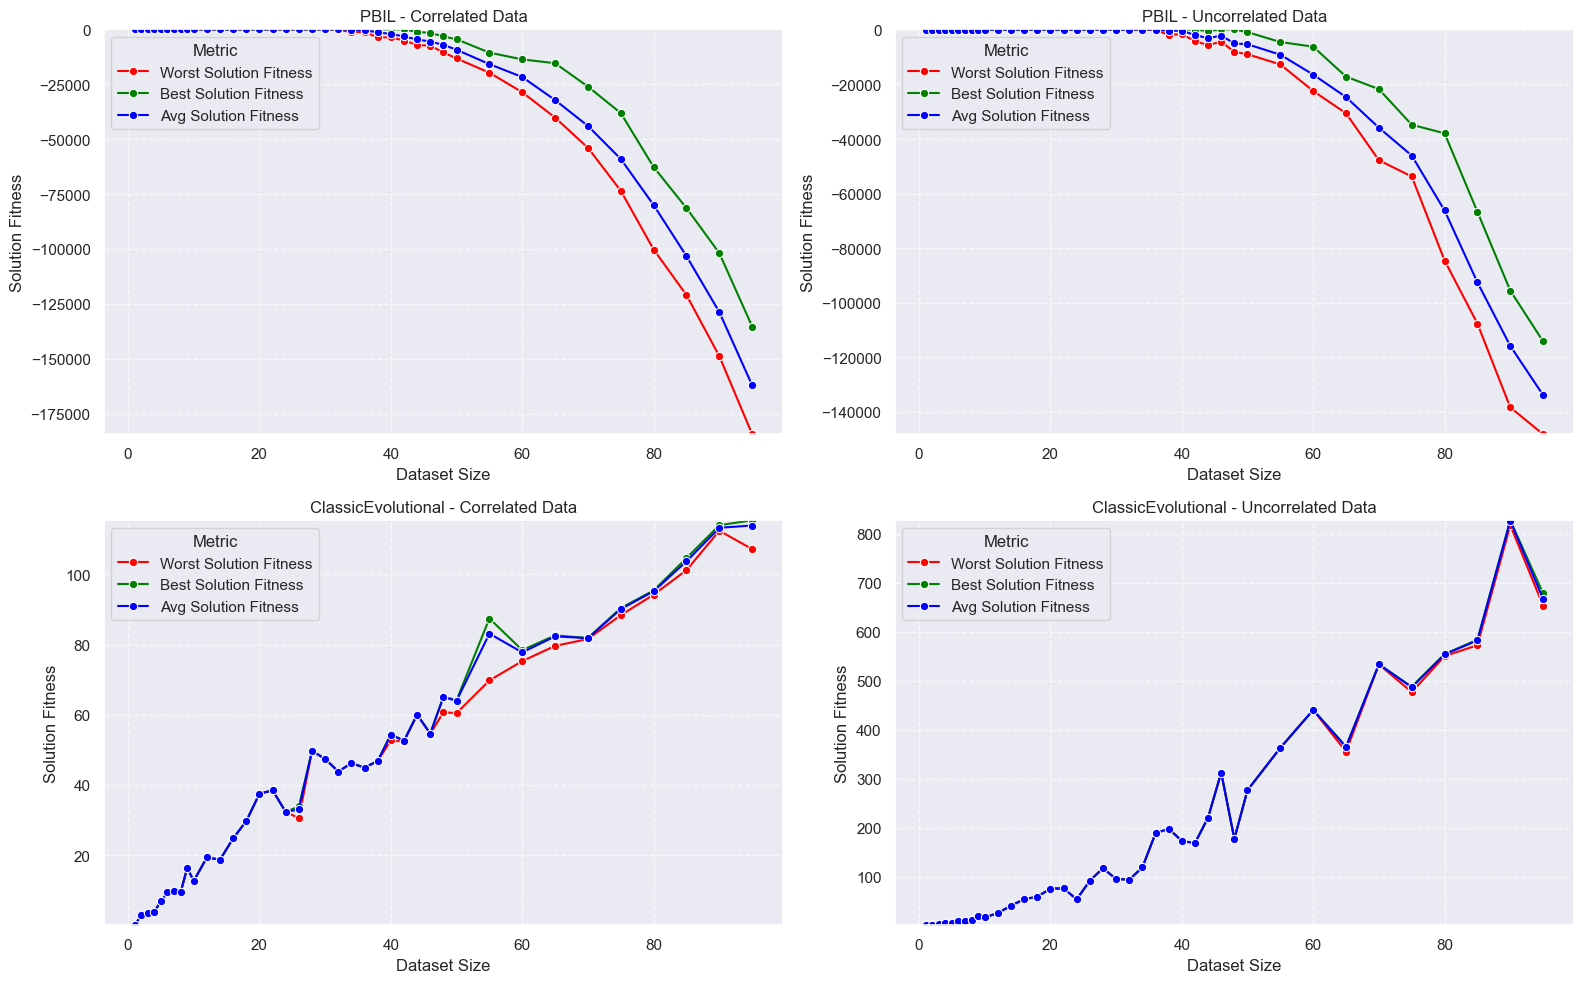

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=False)
fitness_metrics = {
    "worst_solution_fitness": "red",
    "best_solution_fitness": "green",
    "avg_solution_fitness": "blue"
}

algorithms = df["algorithm_name"].unique()
data_types = [(df[df['data_corelated'] == True], 'Correlated Data'),
              (df[df['data_corelated'] == False], 'Uncorrelated Data')]

for row, algorithm in enumerate(algorithms):
    for col, (df_subset, data_type) in enumerate(data_types):
        ax = axes[row, col]
        df_algo = df_subset[df_subset['algorithm_name'] == algorithm]
        
        y_min = df_algo["worst_solution_fitness"].min()
        y_max = df_algo["best_solution_fitness"].max()
        ax.set_ylim(y_min, y_max)
        
        for metric, color in fitness_metrics.items():
            sns.lineplot(ax=ax, data=df_algo, x="dataset_size", y=metric, marker='o', label=metric.replace("_", " ").title(), color=color)
        
        ax.set_title(f"{algorithm} - {data_type}")
        ax.set_xlabel("Dataset Size")
        ax.set_ylabel("Solution Fitness")
        ax.legend(title="Metric")
        ax.grid(True, linestyle="--", alpha=0.7)
        
plt.tight_layout()
plt.show()